# EXp 1

### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as to
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

### Importing the MNIST dataset

In [2]:
img = pd.read_csv("../data/trainMNIST.csv")
img = img.values
img = np.reshape(img, (-1, 28, 28))
label = pd.read_csv("../data/trainMNISTlabels.csv").values

In [3]:
train = img[:50000]
label_tr = label[:50000]
test = img[50000:]
label_ts = label[50000:]

In [4]:
class MNIST(Dataset):
    
    def __init__(self, img, lbl):
        
        self.image = img
        self.label = lbl
    
    
    def __getitem__(self, idx):
            
        image = to.tensor(np.reshape(self.image[idx],(1,28,28)), dtype=to.float32)
        label = to.tensor(self.label[idx][0],dtype=to.int64)
            
        return  image, label
            
    def __len__(self):
        
        return 10000

In [5]:
class mnist(nn.Module):
    
    def __init__(self):
        super(mnist,self).__init__()
        
        # A simple two layer convolution followed by three fully connected layers should do
        
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        
        self.pool1 = nn.MaxPool2d( kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d( kernel_size=3)
        
        self.lin1 = nn.Linear(144, 64)
        self.lin2 = nn.Linear(64, 32)
        self.lin3 = nn.Linear(32, 10)
        
    def forward(self,x):
        
        # forwarding the input through the layers
          
        out = self.pool1(self.conv1(nn.functional.relu(x)))
        out = self.pool2(self.conv2(nn.functional.relu(out)))
        
        out = out.view(-1,144)
        
        out = nn.functional.relu(self.lin1(out))
        out = nn.functional.relu(self.lin2(out))
        out = self.lin3(out)
        
        return out
    
    
    def evaluate(self, x):
        
        # this can be used later for evalutation
        
        m = to.tensor(1.0, dtype=to.float32)
        
        if type(m) != type(x):
            x = to.tensor(x, dtype = to.float32, requires_grad = False)
        
        x = x.view(-1,1,28,28)
        
        with to.no_grad():
            
            out1 = self.forward(x)
            
            return out1
        

## Training

Defining necessary parameters

In [6]:
trainer = MNIST(train,label_tr)
tester = MNIST(test,label_ts)

train_dataloader = DataLoader(trainer, shuffle=True, batch_size= 16,
                        num_workers=4)

test_dataloader = DataLoader(tester, shuffle=True, batch_size= 16,
                        num_workers=4)

model = mnist()

In [7]:
number_epochs = 100
Criterion = nn.CrossEntropyLoss()
Optimizer = to.optim.Adam(model.parameters(),lr = 0.001 )

In [8]:
counter = []
loss_history = [] 
iteration_number= 0

In [9]:
for epoch in range(0,number_epochs):
    
    for data in train_dataloader:
   
        img, lbl = data
    
        Optimizer.zero_grad()
        
        out = model(img)
        
        loss = Criterion(out,lbl)
        
        loss.backward()
        
        Optimizer.step()
    
    # printing the training errors
    
    print("Epoch number {}\n  Current loss {}\n".format(epoch,loss.item()))
    counter.append(epoch)
    loss_history.append(loss.item())
    


Epoch number 0
  Current loss 0.12285053730010986

Epoch number 1
  Current loss 0.2382298856973648

Epoch number 2
  Current loss 0.03432205319404602

Epoch number 3
  Current loss 0.6867504715919495

Epoch number 4
  Current loss 0.04606136679649353

Epoch number 5
  Current loss 0.0017871260643005371

Epoch number 6
  Current loss 0.01664835214614868

Epoch number 7
  Current loss 0.07698929309844971

Epoch number 8
  Current loss 0.06215652823448181

Epoch number 9
  Current loss 0.004269629716873169

Epoch number 10
  Current loss 0.0008361935615539551

Epoch number 11
  Current loss 0.12726014852523804

Epoch number 12
  Current loss 0.010965079069137573

Epoch number 13
  Current loss 0.004839956760406494

Epoch number 14
  Current loss 0.004122734069824219

Epoch number 15
  Current loss 0.008655846118927002

Epoch number 16
  Current loss 0.0036426782608032227

Epoch number 17
  Current loss 0.009038686752319336

Epoch number 18
  Current loss 0.2616906464099884

Epoch number 

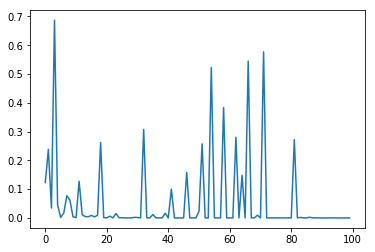

In [10]:
plt.plot(counter,loss_history)
plt.savefig("exp0_result")

In [18]:
loss_history = []

for data in test_dataloader:
   
        img, lbl = data
    
        with to.no_grad():        
            out = model(img)

            loss = Criterion(out,lbl)
        
        loss_history.append(loss.item())
        print(loss)

tensor(0.0000)
tensor(0.)
tensor(0.5685)
tensor(0.0860)
tensor(0.4200)
tensor(0.7568)
tensor(0.)
tensor(0.5032)
tensor(0.)
tensor(0.0000)
tensor(0.7692)
tensor(0.)
tensor(0.0001)
tensor(0.3348)
tensor(1.3247)
tensor(1.3664)
tensor(0.2059)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.9179)
tensor(0.)
tensor(0.0299)
tensor(2.3842e-07)
tensor(0.2864)
tensor(1.2610)
tensor(0.0248)
tensor(0.)
tensor(0.0003)
tensor(0.4378)
tensor(2.1065)
tensor(0.2926)
tensor(0.0000)
tensor(5.9605e-08)
tensor(0.)
tensor(5.9605e-07)
tensor(0.)
tensor(0.)
tensor(0.0001)
tensor(0.0016)
tensor(3.3379e-06)
tensor(0.)
tensor(9.7752e-06)
tensor(0.0128)
tensor(0.5256)
tensor(0.)
tensor(0.)
tensor(1.1921e-07)
tensor(0.2484)
tensor(2.3842e-07)
tensor(0.2358)
tensor(0.)
tensor(0.)
tensor(0.0000)
tensor(4.1723e-07)
tensor(0.0000)
tensor(0.0010)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(3.5763e-07)
tensor(0.)
tensor(0.)
tensor(2.5540)
tensor(1.1921e-07)
tensor(0.)
tensor(0.6083)
tensor(3.0063)
tensor(0.5654)
tensor(2.8610e-06

IndexError: Traceback (most recent call last):
  File "/home/rishi/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/rishi/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "<ipython-input-4-92daaec89147>", line 11, in __getitem__
    image = to.tensor(np.reshape(self.image[idx],(1,28,28)), dtype=to.float32)
IndexError: index 9999 is out of bounds for axis 0 with size 9999


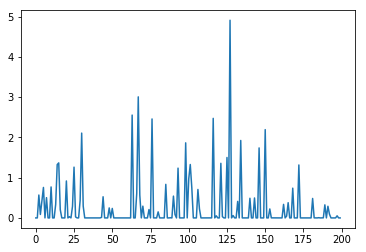

In [19]:
plt.plot(loss_history[:200])
plt.savefig("exp0_loss")

In [20]:
to.save(model.state_dict(), "exp0_result")